In [469]:
from IPython.display import Image
from IPython.core.display import HTML 

In [244]:
import numpy as np
import pandas as pd
from math import factorial
import random

random.seed(10)

### Обозначения

* $m$ – кол-во мест в очереди
* $n$ – кол-во каналов
* $\alpha$ – интенсивность потока заявок
* $\mu$ – интенсивность потока обслуживания
* $\mu$ – интенсивность потока обслуживания
* $\nu$ – параметр распределения времени ожидания в очереди
* $ S_i, i \in \overline{0,n+m} $ – i-ое сотстояние системы. При $i<=n$ $S_i$ значит, что у системы пустая очередь и заняты $i$ каналов. При $n<i<=n+m$ $S_i$ означает, что все каналы заняты, а также занято $i-n$ мест в очереди
* $\rho=\frac{\alpha}{\mu}$ – коэффициент загрузки СМО
* $p_{отк}$ – вероятность отказа в обслуживании поступившей в СМО заявки
* $Q = p_{обс} = 1 - p_{отк}$ – вероятность обслуживания поступившей заявки(относительная
пропускная способность)
* $A=\alpha Q$ – среднее число заявок, обслуживаемых в СМО в единицу времени (абсолютная
пропускная способность СМО)
* $L_{смо}$ - среднее число заявок, находящихся в СМО
* $n_3$ - среднее число каналов в СМО, занятых обслуживанием заявок

In [245]:
alpha   = 10 
mu      = 3
nu      = 6
m       = 4
n       = 3
ro      = alpha / mu
beta    = nu / mu


In [246]:
def count_intensity(state):
    # 0 < state < n + m
    r_intensity = alpha
    l_intensity = state * mu if state <= n else n * mu + (state - n) * nu
    return l_intensity, r_intensity

In [247]:
def triple_step(left_intensity, right_intensity):
    # step for inner node
    p1 = left_intensity * delta_t
    p2 = right_intensity * delta_t
    
    rv = np.random.uniform()
    if rv < p1:
        return -1
    elif p1 < rv < p1 + p2:
        return 1
    else:
        return 0

def one_step(intensity, sign):
    #generates step for outer nodes
    p = intensity * delta_t
    rv = np.random.uniform()
    return sign * 1 if rv < p else 0


def make_step(state):
    step = -2
    
    if state == 0:
        step =  one_step(alpha, 1)
    elif state == n + m:
        step =  one_step(n * mu + m * nu, -1)
    else:
        l_intensity, r_intensity = count_intensity(state)
        step =  triple_step(l_intensity, r_intensity)
    
    
    return step

**Описание работы алгоритма**

СМО может находится в $i \in  \overline{0, m+n+1}$ состояниях

Из состояния $i$ она может перейти только в состояния $i-1$ или $i+1$.

При $\delta(t) \to 0$

* Из состояние $S_0$ можно перейти $S_1$ с вероятностью $\alpha\delta(t)$ или остаться в $S_0$ с вероятностью $1 - \alpha \delta(t) $
* Из состояние $S_i, i \in \overline{1, n}$ можно перейти $S_{i-1}$ с вероятностью $i\mu\delta(t)$ или перейти в $S_{i+1}$ с вероятностью $\alpha\delta(t)$, или остаться в $S_{i}$ с вероятностью $1 - (\alpha\delta(t) + i * \mu * \delta(t))$
* Из состояния $S_i, i \in \overline{n+1, m-1}$ можно перейти $S_{i-1}$ с вероятностью $(n\mu + m\rho)\delta(t)$ или перейти в $S_{i+1}$ с вероятностью $\alpha\delta(t)$, или остаться в $S_{i}$ с вероятностью $1 - (\alpha\delta(t) + (n  \mu + m\rho)  \delta(t)))$
* Из состояния $S_m$ в $S_{m-1}$ с вероятностью $(n\mu + m\rho)\delta(t)$ или остаться в $S_m$ с вероятностб 1 - вероятность перехода в $S_{m-1}$

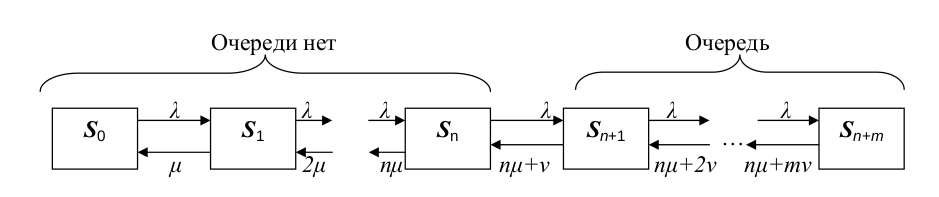

In [470]:
Image(filename= "/home/dsei/dev/uni/mmod/ipr2/image.png")

In [419]:
state = 0
T = 0 
num_of_iters = 2 * 10**5
data = pd.DataFrame(columns=['Time', 'State'])
delta_t = 10**-3
for i in range(num_of_iters):
    T += delta_t
    state += make_step(state)
    data.loc[i] = [T, state]

### Сравнение  характеристик СМО, полученных в результате моделирования, с теоретическими характеристиками 

**1) Сравнение финальных вероятностей** 

* Вычислим вероятности для модели
* Вычисли  эмпирические вероятности
* Сравним их

**Вычисление вероятностей исходной модели**
____

Решая ур-ния Эрланга для исходной модели, получим следующие вероятности:

* $p_0 =(\sum_{i=0}^{n}\frac{\rho^{i}}{i!} +  \frac{\rho^n}{n!}\sum_{i=1}^{m} \frac{\rho^i}{\prod_{l=1}^{i}(n+l\beta)
})^{-1}$

In [420]:
p_values = []

In [421]:
p_0_1 = 0
for i in range(0,n+1):
    p_0_1 += ro**i / factorial(i)

p_0_2_1 = ro**n / factorial(n)
p_0_2_2 = 0
for i in range(1, m+1):
    p_0_2_3 = 1
    for l in range(1, i+1):
        p_0_2_3 *= n + l * beta
    
    p_0_2_2 += ro**i / p_0_2_3
    
p_0 = (p_0_1 + p_0_2_1 * p_0_2_2)**-1
p_values.append(p_0)

* $p_k=\frac{\rho^k}{k!}p_0, \; k \in \overline{1,n}$

In [422]:
for i in range(1, n + 1):
    p_i = ro**i / factorial(i) * p_0
    p_values.append(p_i)

* $p_{n+i}=p_n \frac{\rho^i}{  \prod_{l=1}^{i}(n+l\beta) }$

In [423]:
from functools import reduce # Valid in Python 2.6+, required in Python 3
import operator

In [424]:
p_n = p_values[n]
for i in range(1, m+1):
    p_n_i = p_n * ro**i / reduce(operator.mul, [n + l * beta for l in range(1, i+1)], 1)
    p_values.append(p_n_i)

В результате получаем следующие значение для $p_i$ модели

In [425]:
for i in range(len(p_values)):
    print(f'p_{i} \t = \t{p_values[i]}')

p_0 	 = 	0.0433232164872211
p_1 	 = 	0.14441072162407034
p_2 	 = 	0.24068453604011725
p_3 	 = 	0.267427262266797
p_4 	 = 	0.178284841511198
p_5 	 = 	0.08489754357676095
p_6 	 = 	0.031443534658059616
p_7 	 = 	0.00952834383577564


Выведем экспериментальные $p_i$

In [426]:
empiric_p_values = [len(data[data['State'] == i]) / len(data) for i in range(n+m+1)]
for i in range(len(p_values)):
    print(f'empiric p_{i} \t = \t{empiric_p_values[i]}')

empiric p_0 	 = 	0.045215
empiric p_1 	 = 	0.1469
empiric p_2 	 = 	0.25062
empiric p_3 	 = 	0.28327
empiric p_4 	 = 	0.17081
empiric p_5 	 = 	0.069215
empiric p_6 	 = 	0.026695
empiric p_7 	 = 	0.007275


Выведем абсолютную разницу между эмпирическими и теоретическими значениями

In [427]:
for i in range(len(p_values)):
    print(f'p_i - emp_p_i \t = \t {abs(p_values[i] - empiric_p_values[i])}')

p_i - emp_p_i 	 = 	 0.0018917835127788968
p_i - emp_p_i 	 = 	 0.00248927837592966
p_i - emp_p_i 	 = 	 0.009935463959882762
p_i - emp_p_i 	 = 	 0.01584273773320305
p_i - emp_p_i 	 = 	 0.0074748415111980104
p_i - emp_p_i 	 = 	 0.01568254357676095
p_i - emp_p_i 	 = 	 0.004748534658059616
p_i - emp_p_i 	 = 	 0.0022533438357756393


Из результатов выше мы видим, что вероятности довольно сходны. Максимальная разница состовляет $0.018587543576760956$

**2) Анализ абсолютной пропускной способности** 

Напомним, что $A = \alpha Q, \; где \; Q = p_{обс} = 1 - p_{отк}$

Оценим A эмпирической модели исходя из следующих соображений. 
Если построенная СМО сходится к теоретической, то
* $alpha$ построенной СМО должно сходитбся к $alpha$ исходной модели
* $p_{отк}$ построенной СМО также должно сходиться к $p_{отк}$ исходной модели

Из рассуждений выше можно сделать вывод, что $A_{estimated}$ также должно сходиться к исходной $A$

____
Т.к. оценка $p_{отк}$ у нас уже есть, то остается добавить оценку $alpha$.

В качестве оценки $alpha$ возьмем среднее кол-во заявок за единицу времени.

In [428]:
amount_of_applications = 0
previous_state = 0
for state in data['State']:
    if state > previous_state:
        amount_of_applications += 1
    previous_state = state
    
alpha_est = amount_of_applications / len(data) / delta_t
print(f'Оценочное значение alpha = {alpha_est}')

Оценочное значение alpha = 9.834999999999999


In [429]:
Q_est = empiric_p_values[n + m]
A_est = alpha_est * Q_est 

Q     = p_values[n + m]
A     = alpha * Q

In [430]:
print(f'Тeоретическое значение A \t\t=\t {A}')
print(f'Эмпирическое значение A \t\t=\t {A_est}')
print(f'Абсолютная разница между значениями \t=\t {abs(A - A_est)}')

Тeоретическое значение A 		=	 0.09528343835775639
Эмпирическое значение A 		=	 0.07154962499999999
Абсолютная разница между значениями 	=	 0.0237338133577564


**3) Вероятности отказа**



In [431]:
print(f'Тeоретическое значение Q \t\t=\t {Q}')
print(f'Эмпирическое значение Q \t\t=\t {Q_est}')
print(f'Абсолютная разница между значениями \t=\t {abs(Q - Q_est)}')

Тeоретическое значение Q 		=	 0.00952834383577564
Эмпирическое значение Q 		=	 0.007275
Абсолютная разница между значениями 	=	 0.0022533438357756393


**4) Cредние число заявок в СМО**

$L_{обс} = \sum_{k=1}^{n} kp_{k} + \sum_{i=1}^{m} n p_{n+i}$

In [432]:
L_served = sum(k * p_values[k] for k in range(n+1)) 
+ sum([n * p_values[n + i] for i in range(1, m + 1)])

L_served_est = sum(k * empiric_p_values[k] for k in range(n+1))

print(f'Тeоретическое значение L_served\t\t=\t {L_served}')
print(f'Эмпирическое значение L_served \t\t=\t {L_served_est}')
print(f'Абсолютная разница между значениями \t=\t {abs(L_served - L_served_est)}')

Тeоретическое значение L_served		=	 1.4280615805046957
Эмпирическое значение L_served 		=	 1.4979500000000001
Абсолютная разница между значениями 	=	 0.06988841949530444


**5) Среднее число заявок в очереди**

$L_{оч}= \sum_{i=1}^{m}ip_{n+i}$

In [433]:
L_queue = sum(i * p_values[n + i] for i in range(1, m + 1))
L_queue_est = sum(i * empiric_p_values[n + i] for i in range(1, m + 1))

print(f'Тeоретическое значение L_queue\t\t=\t {L_queue}')
print(f'Эмпирическое значение L_queue \t\t=\t {L_queue_est}')
print(f'Абсолютная разница между значениями \t=\t {abs(L_queue - L_queue_est)}')

Тeоретическое значение L_queue		=	 0.48052390798200134
Эмпирическое значение L_queue 		=	 0.418425
Абсолютная разница между значениями 	=	 0.06209890798200135


**6) Cреднее время пребывания заявки в СМО**

$\overline{t_{смо}} = \frac{Q}{\mu} + t_{ожидания}$

In [434]:
amount_of_served_applications = 0
previous_state = 0
for state in data['State']:
    if state < previous_state:
        amount_of_served_applications += 1
    previous_state = state
    
mu_est = (amount_of_served_applications / len(data) - Q) / delta_t
print(f'Оценочное значение mu = {mu_est}')

Оценочное значение mu = 0.28665616422436124


In [435]:
print(f'Тeоретическое значение avg_t_смо\t\t=\t {Q / mu + 1 / nu}')
print(f'Эмпирическое значение avg_t_смо \t\t=\t {Q_est / mu_est + 1 / nu}')
print(f'Абсолютная разница между значениями \t=\t {abs(Q / mu + 1 / nu - Q_est / mu_est + 1 / nu)}')

Тeоретическое значение avg_t_смо		=	 0.16984278127859187
Эмпирическое значение avg_t_смо 		=	 0.19204550343330243
Абсолютная разница между значениями 	=	 0.31113061117862273


### Демонстрация работоспособности с помощью графиков

In [437]:
from matplotlib.pyplot import figure

# figure(figsize=(15, 10), dpi=80)

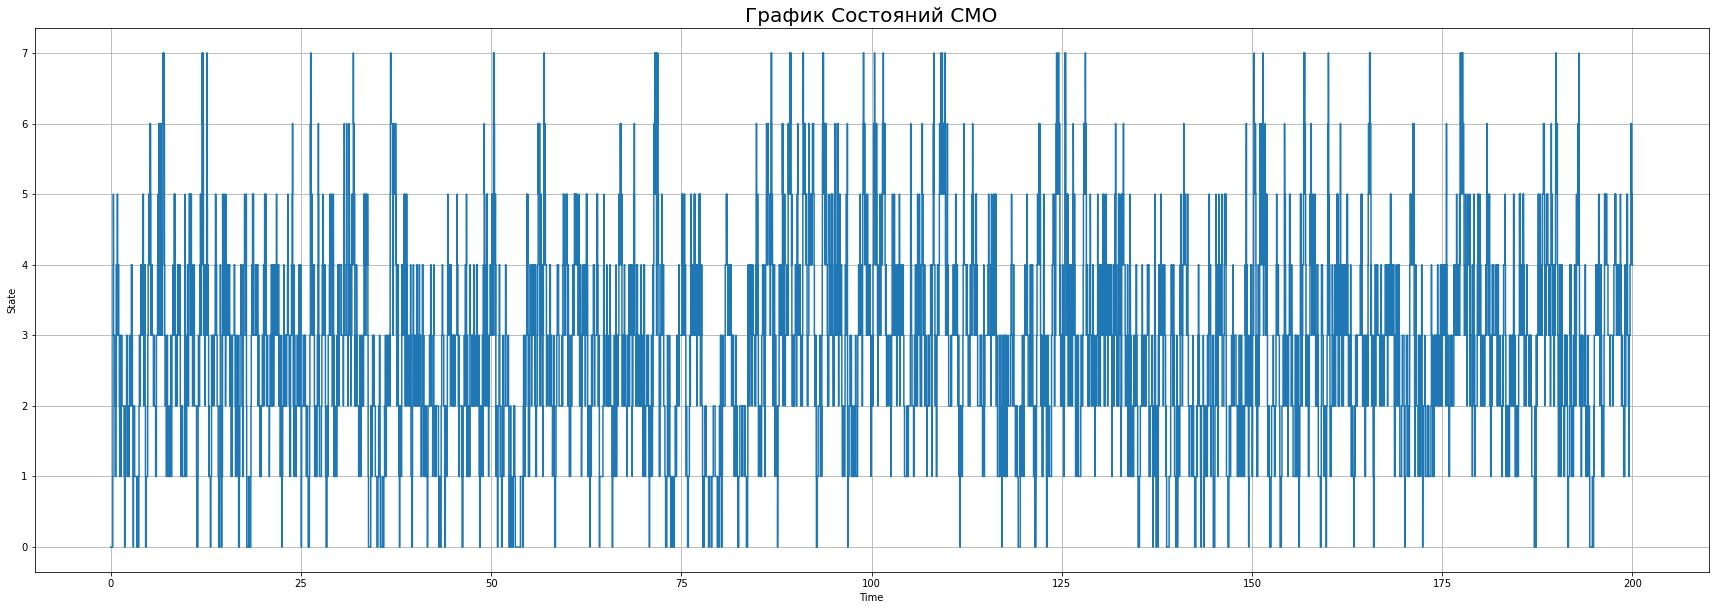

In [438]:
import matplotlib.pyplot as plt


plt.step(data['Time'], data['State'])
plt.xlabel('Time')
plt.ylabel('State')
plt.grid(True)
plt.rcParams["figure.figsize"] = (30,10)
plt.title('График Состояний СМО', fontsize=20)
plt.show()

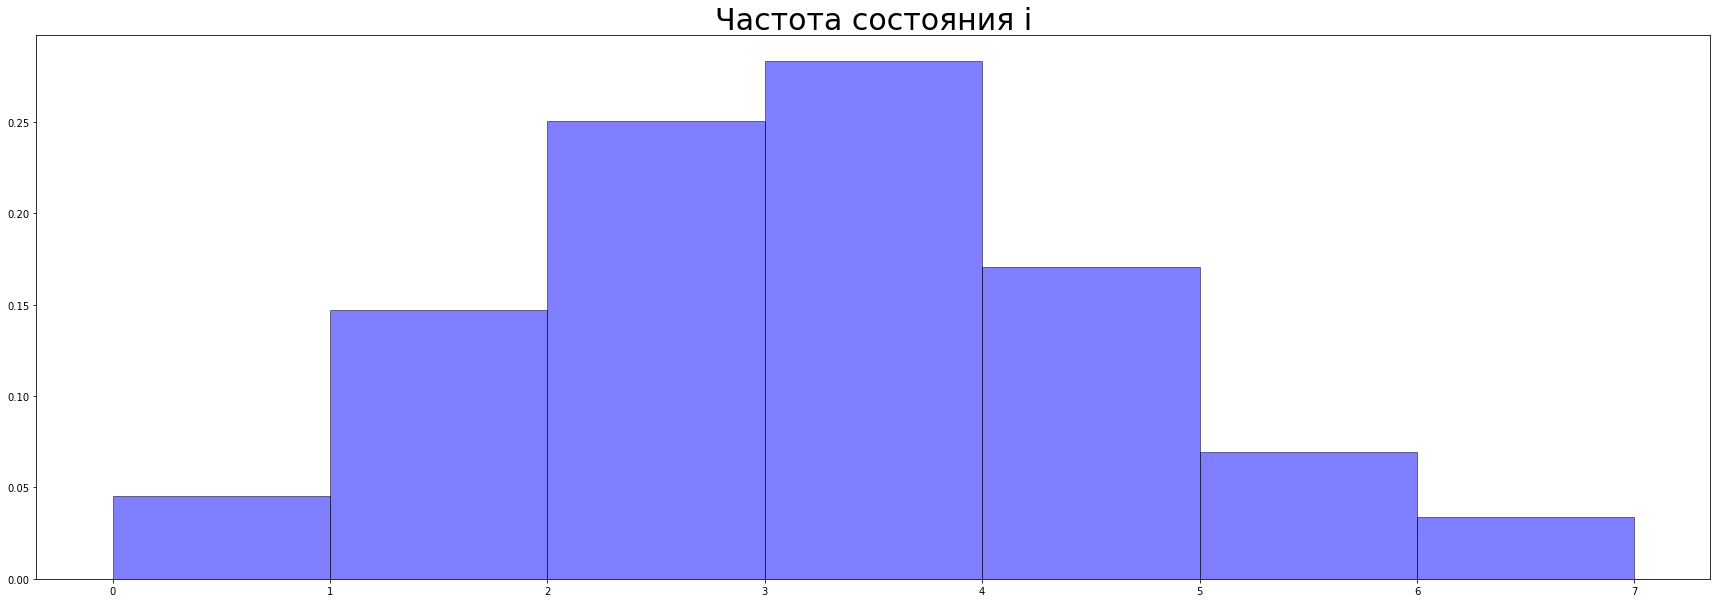

In [439]:
plt.hist(data['State'], density=True, bins=7, facecolor='blue', alpha=0.5, histtype='bar', ec='black')
plt.rcParams["figure.figsize"] = (20,15)
plt.title('Частота состояния i', fontsize=30)
plt.show()

In [440]:
empiric_p_values

[0.045215, 0.1469, 0.25062, 0.28327, 0.17081, 0.069215, 0.026695, 0.007275]

### Графики, показывающие установку стационарного режима СМО.

При установке стационарного режима СМО $p_i(t)$ стремятся к константным значениями $p_i$

In [441]:
def count_p(i, t):
    tdata = data[data['Time'] <= t]
    return len(tdata[tdata['State'] == i]) / len(tdata)

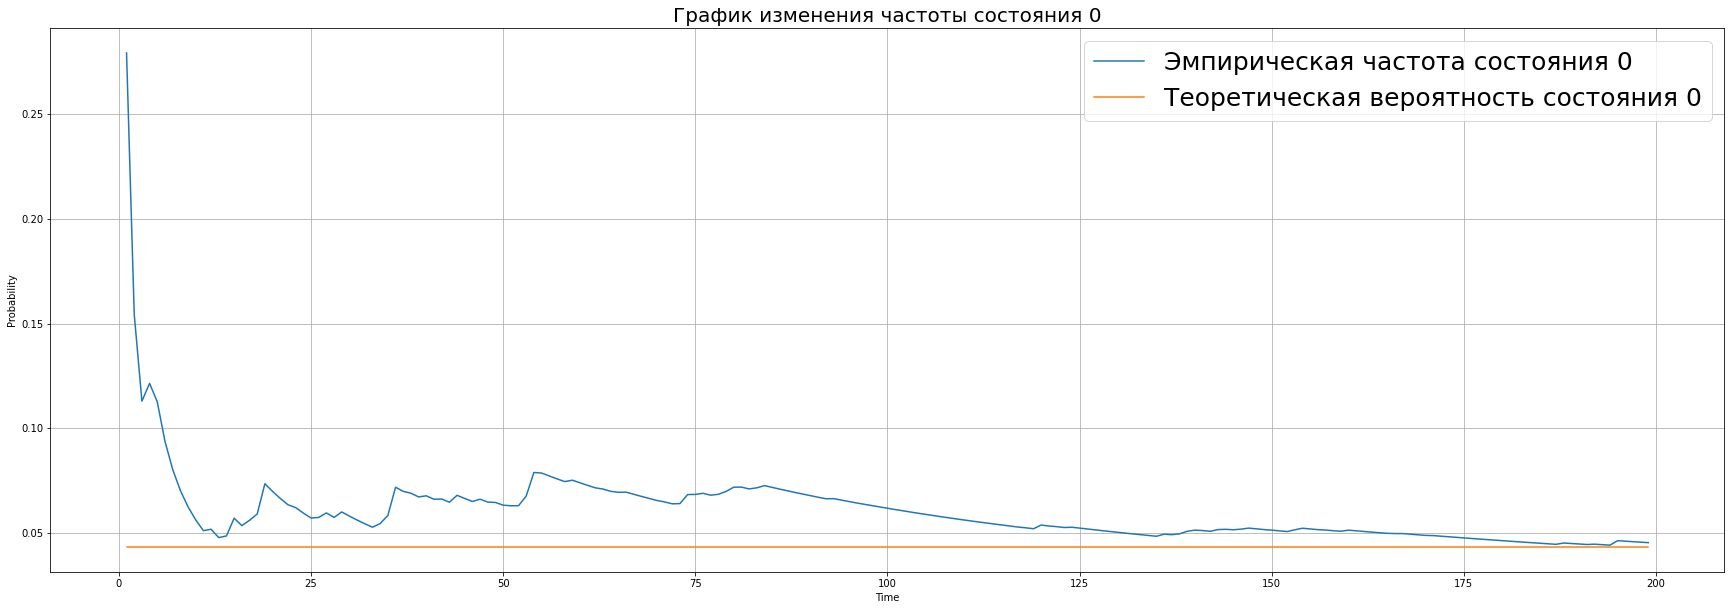

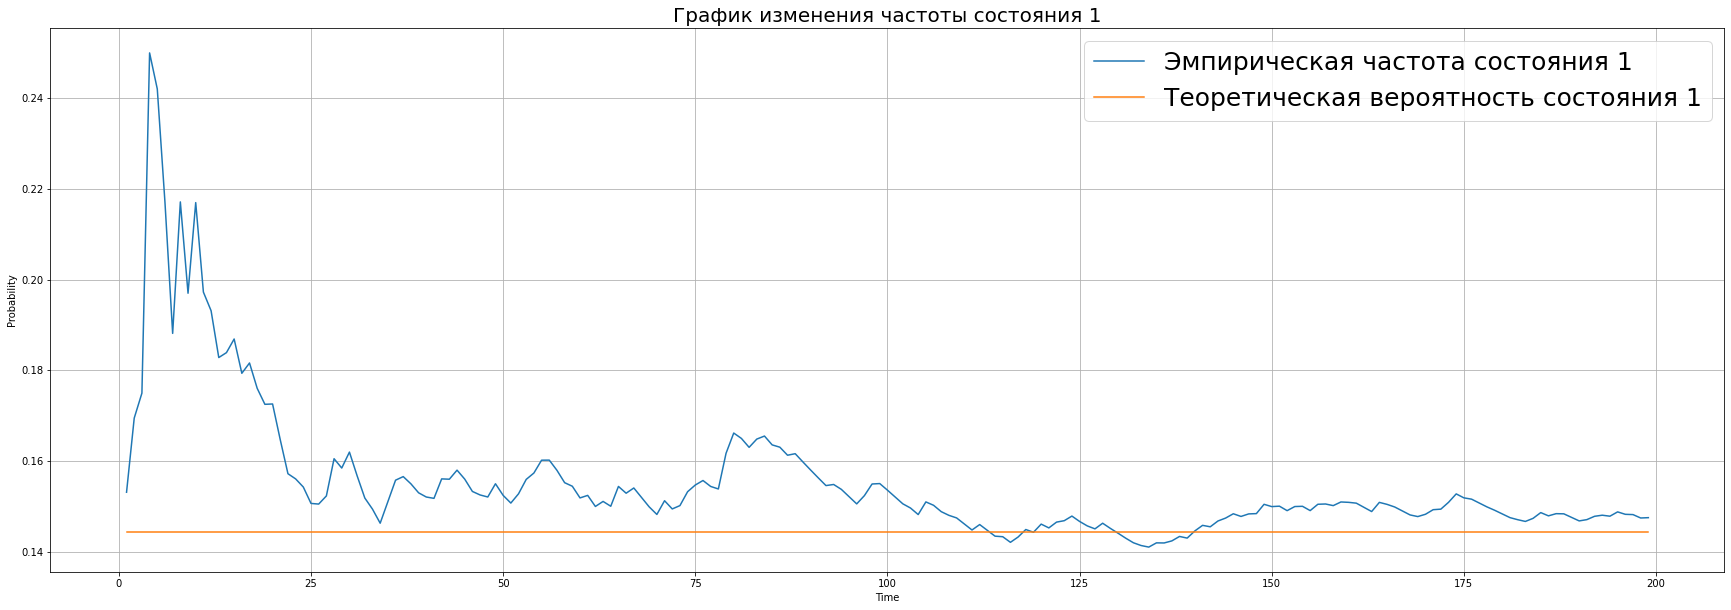

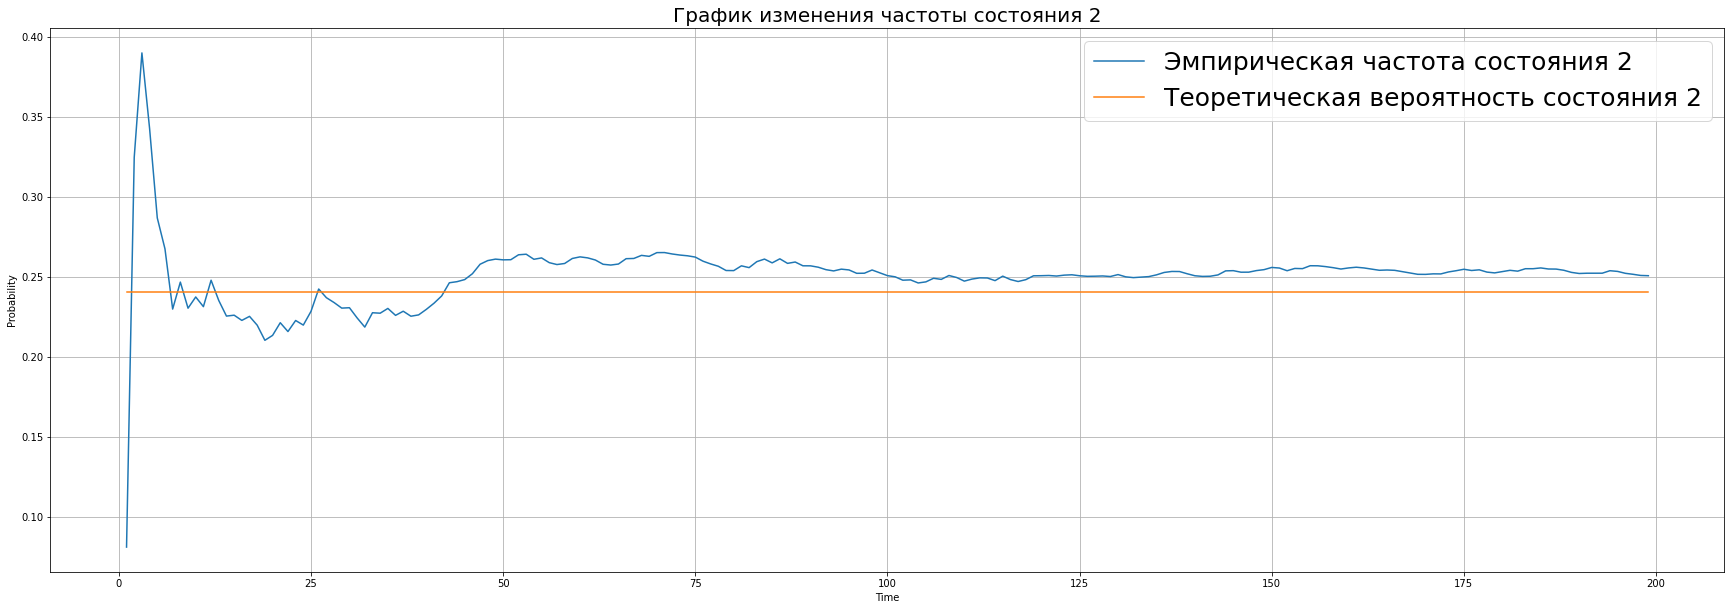

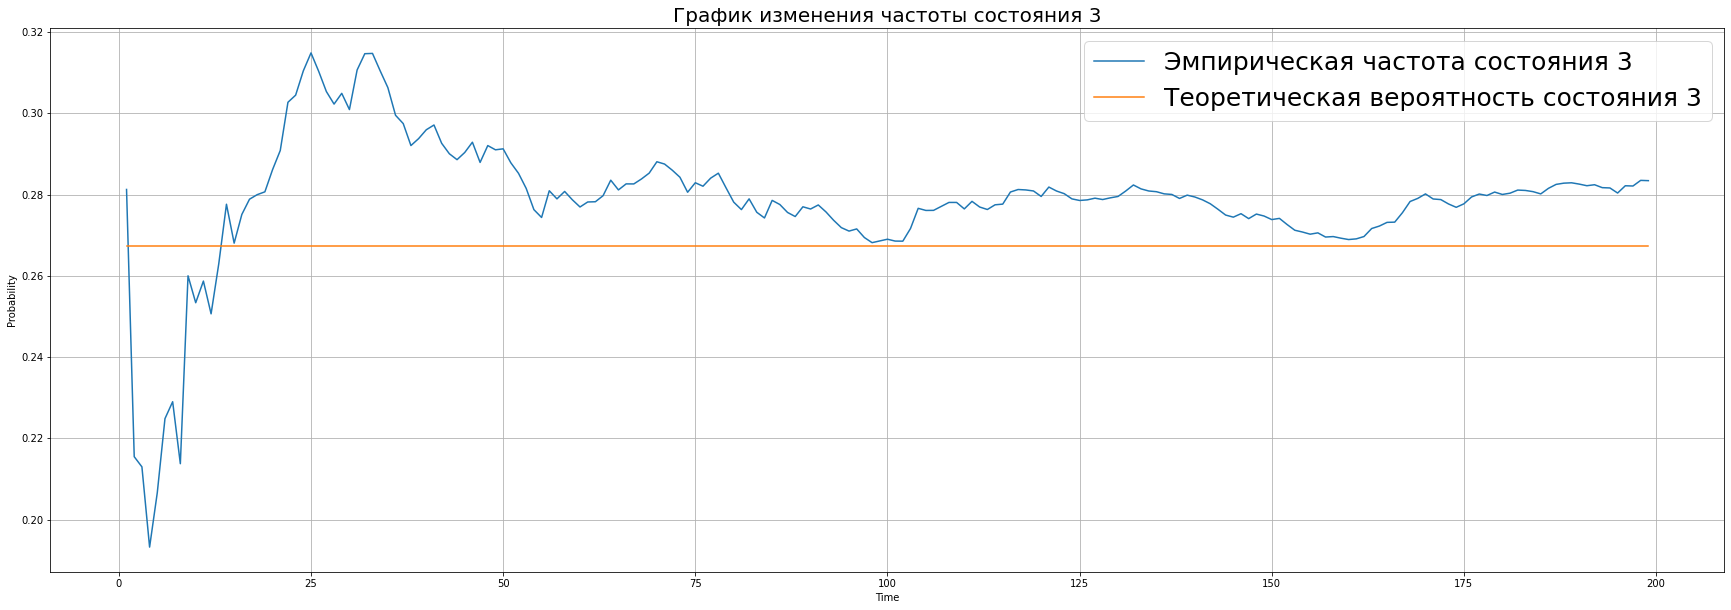

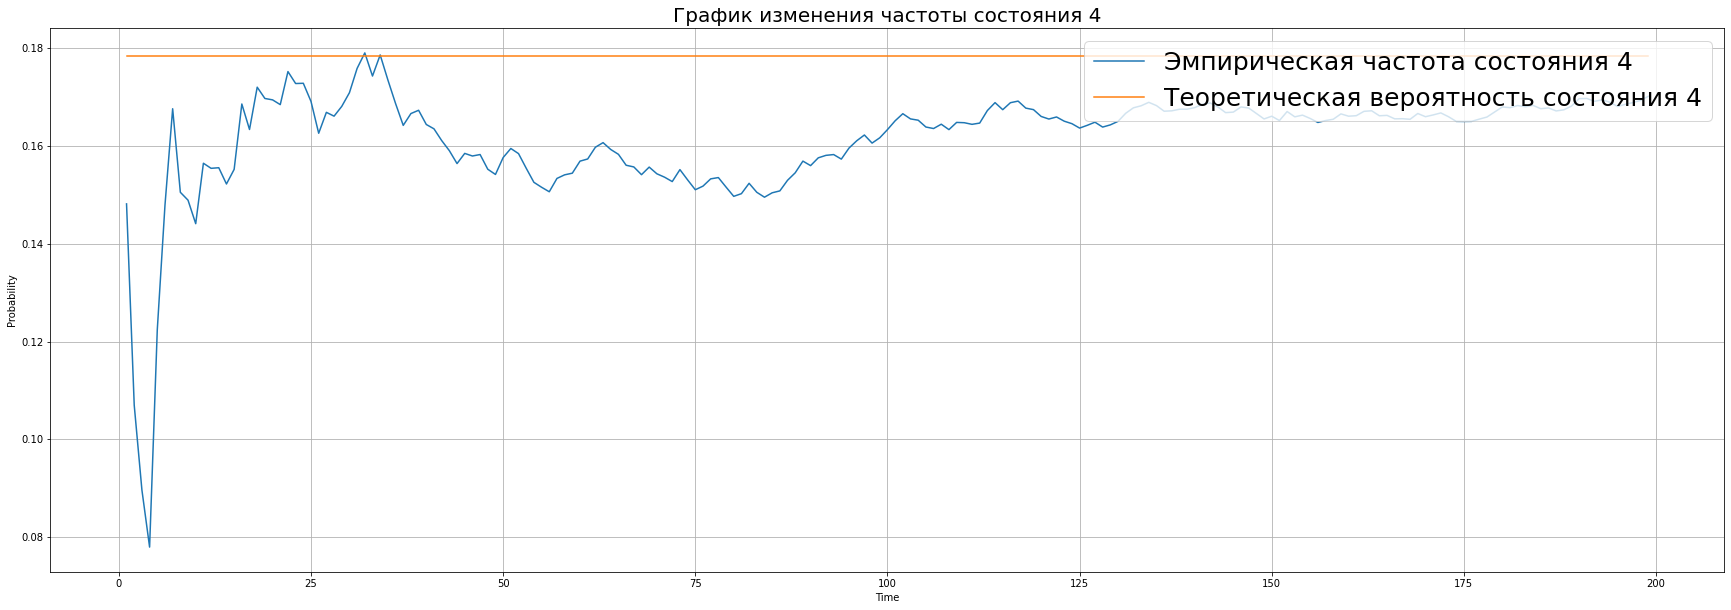

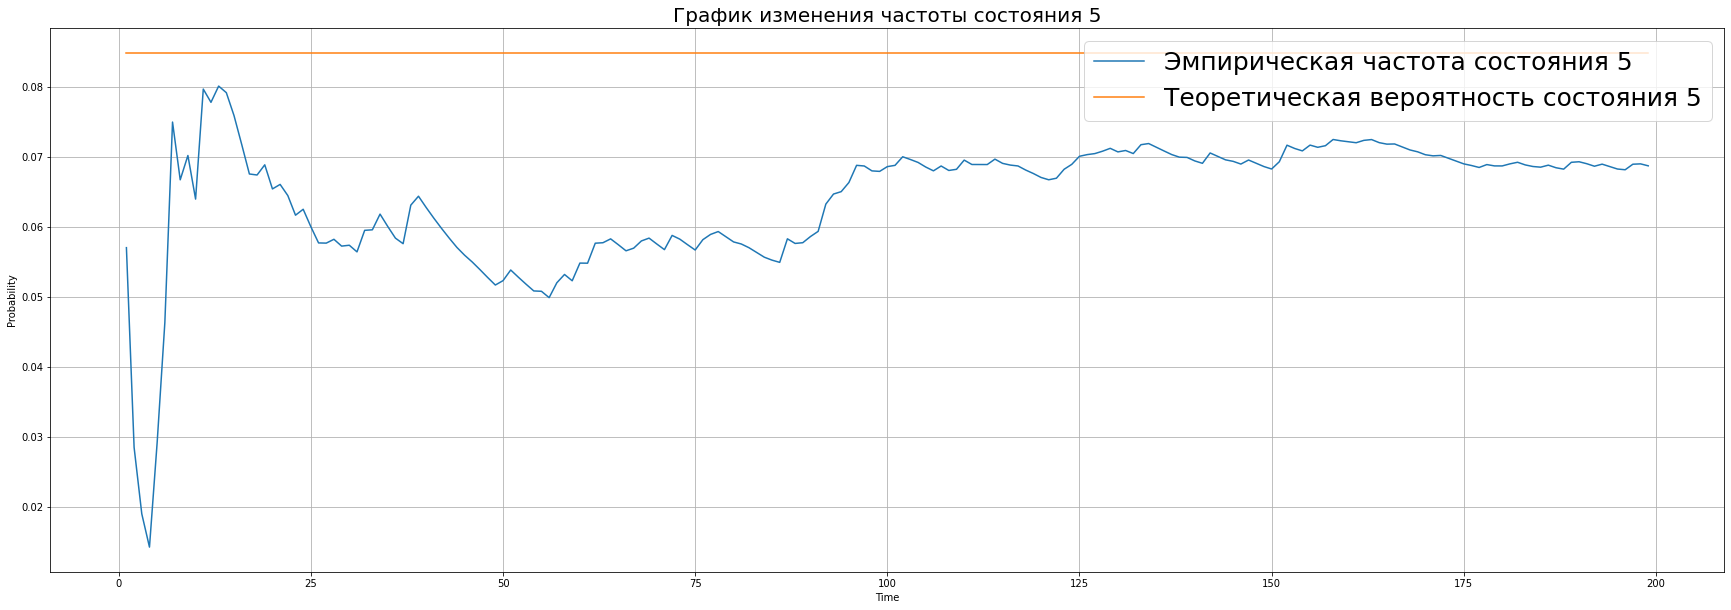

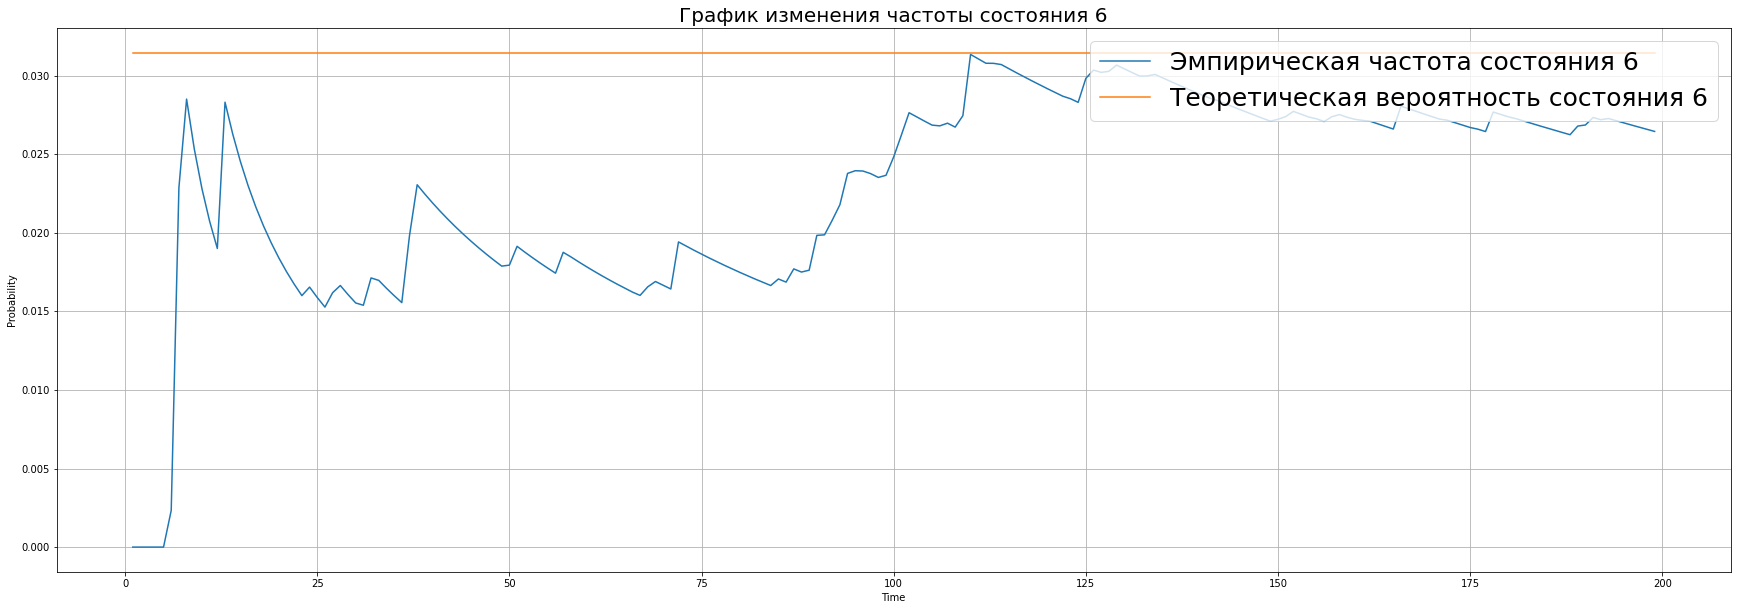

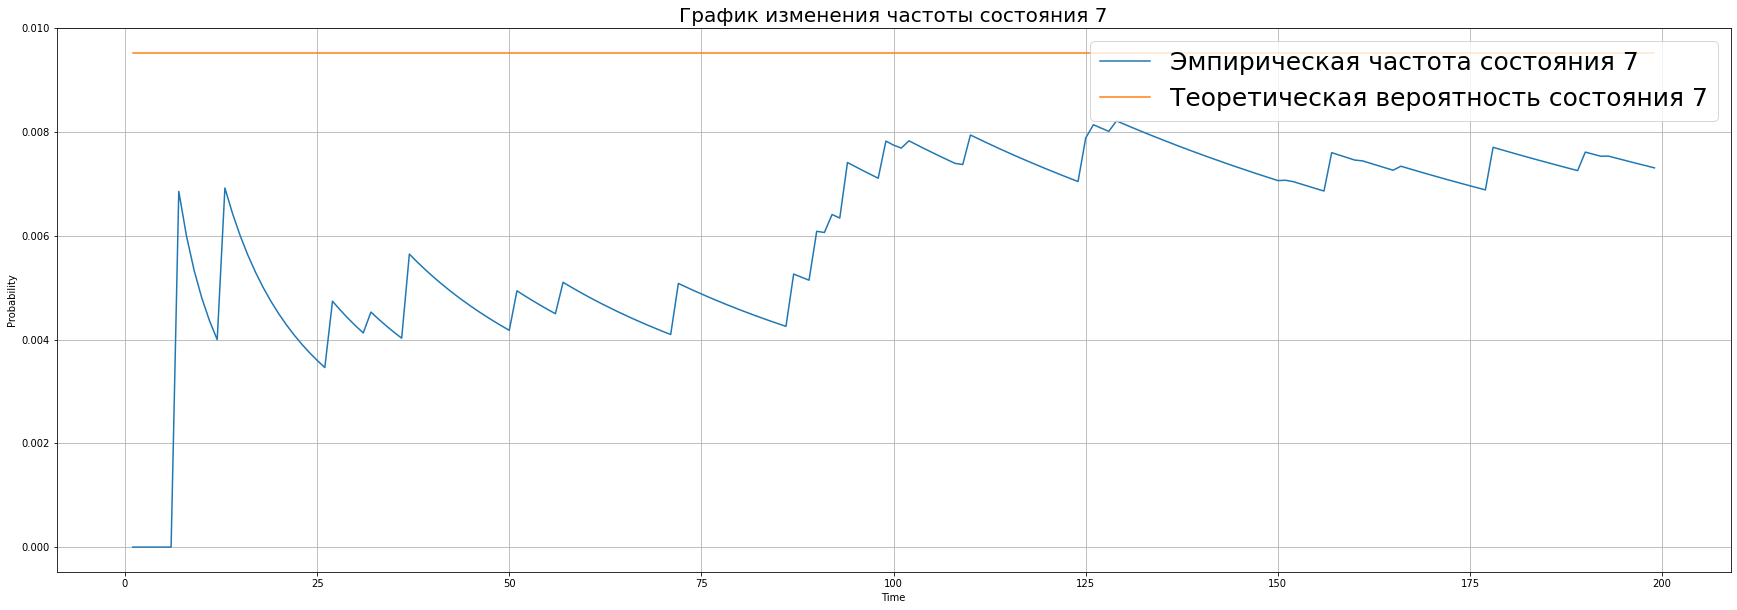

In [466]:
for i in range(0, m + n + 1):
    t_values = list(range(1, 200))
    p_i_values = [count_p(i, t) for t in t_values]
    plt.xlabel('Time')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.rcParams["figure.figsize"] = (30,10)
    plt.title(f'График изменения частоты состояния {i}', fontsize=20)
    plt.plot(t_values, p_i_values, label=f'Эмпирическая частота состояния {i}')
    plt.plot(t_values, [p_values[i] for _ in t_values], label=f'Теоретическая вероятность состояния {i}')
    plt.legend(loc="upper right", prop={'size': 25})
    plt.show()